<a href="https://colab.research.google.com/github/penzen/Codes-/blob/master/Traffic_Signs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

!git clone https://bitbucket.orgjadslim/german-traffic-signs
This is a  repository, that has images of trafic sigh and we will be using these to classify the images. 

! - helps us write shell commands on google colab, 

git clone - It's a command used to copy a repository(files) 

After the clonning has been done, it will create a new directory. 

The directory is called german-traffic-signs and we use ls which means list to see what the directory contains.  

In [4]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [5]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras.models import Sequential ,Model
from keras.layers import Flatten,Dense,Dropout
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils.np_utils import to_categorical
from  tensorflow.keras.optimizers import Adam
import pickle 
import pandas as pd

#Pickling
The rest of the files are Pickling files that contain our respective training, testing and validation data sets.

 Pickling  can be serialized before writing it to file by serializing it.

It converts all the object to a character stream.

Pickled files in Python essentially contain serialized data that can be unpicked when desired, since the character stream we just talked about contains all the information necessary to reconstruct the serialized object and thus unpick a link would be the inverse operation of pickling.


In [7]:
np.random.seed(0)
#rb is read binary
# is used to excecute two operation as a pair and invoke a block of code between 
with open('german-traffic-signs/train.p','rb') as f:
  train_data = pickle.load(f)
with open('german-traffic-signs/test.p','rb') as f:
  test_data = pickle.load(f)
with open('german-traffic-signs/valid.p','rb') as f:
  valid_data = pickle.load(f)

print(type(test_data))

X_train,Y_train = train_data['features'], train_data['labels']
X_val,Y_val =  valid_data['features'], valid_data['labels']
X_test,Y_test = test_data['features'], test_data['labels']
 


<class 'dict'>


In [8]:
print(X_train.shape,X_val.shape, X_test.shape )
#The images are 32 by 32 with a depth of 3 channels because they are colored

(34799, 32, 32, 3) (4410, 32, 32, 3) (12630, 32, 32, 3)


In [9]:
# makes sure the images and labels are  equal
assert(X_train.shape[0] ==Y_train.shape[0]) ,"The images and labels are not equal"
assert(X_val.shape[0] ==Y_val.shape[0]) ,"The images and labels are not equal"
assert(X_test.shape[0] ==Y_test.shape[0]) ,"The images and labels are not equal"

assert(X_train.shape[1:] == (32,32,3)), "The dimenstion of the images are not 32 by 32"
assert(X_val.shape[1:] == (32,32,3)), "The dimenstion of the images are not 32 by 32"
assert(X_test.shape[1:] == (32,32,3)), "The dimenstion of the images are not 32 by 32"

#pandas
As we saw earlier.

And so to manipulate and analyze data and sort of a CSI file, we will make use of a python and data analysis laboratory known as pandas.

We will import the Python Data Analysis Library and we import it as the alias PD and any data scienceproject.

Oftentimes you'll work with pandas comma separated value files.

Today, it's become standard for data scientists to use Pender's when importing data from CSV files.

And we do so with a very specific function, which will be from Pender's, the function being read CSV, which in essence simply loads our data from a specified Seattleite file in our case.

In [10]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

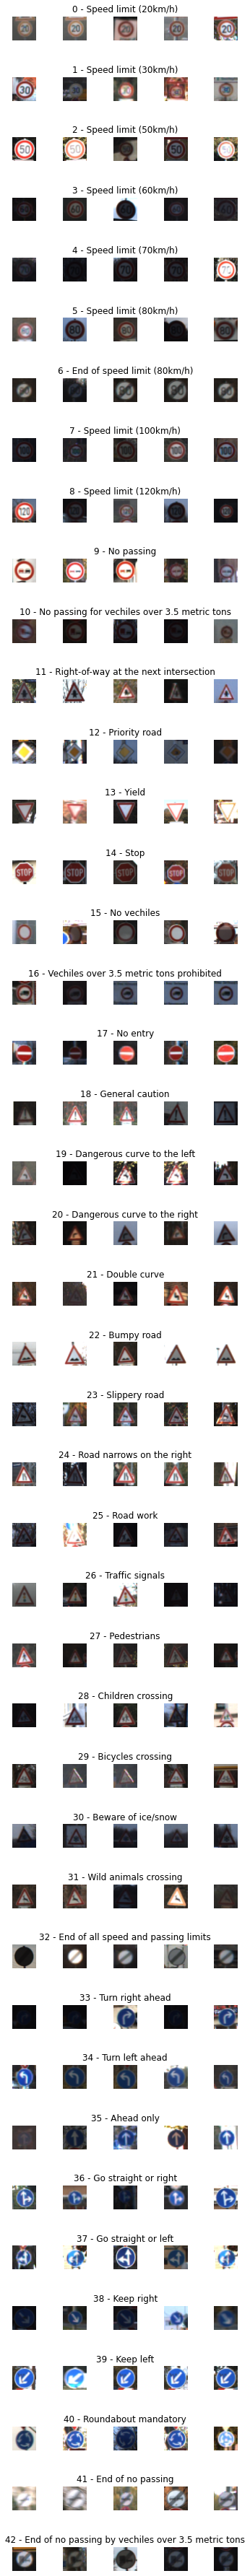

In [14]:
num_of_samples=[]
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()
 
for i in range(cols):
  for j, row in data.iterrows():
    x_selected = X_train[Y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j) + " - " + row["SignName"])
      num_of_samples.append(len(x_selected))


       
         
         
        
      

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

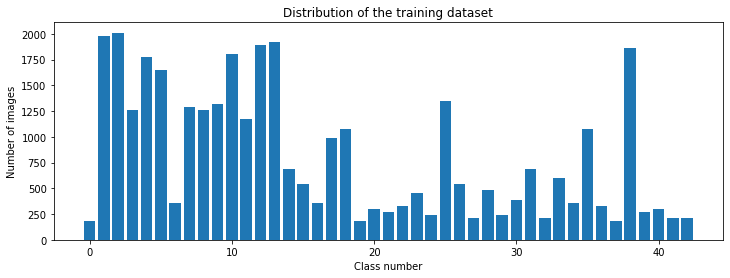

In [15]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

(32, 32, 3)
36


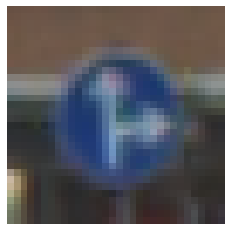

In [16]:
import cv2 

plt.imshow(X_train[900])
plt.axis('off')
print(X_train[900].shape) # image
print(Y_train[900]) #label value 

#Converting to Gray_Scale
This greyscale conversion is important for two main reasons, the first being that one distinguishing

between traffic signs.

Color is not a very significant feature to look for.

The lighting in our image varies and many of the traffic signs of similar colors reinforcing that it

is not a very relevant piece of information, the features of the traffic signs that really matter are

the edges of the curves, the shape inside of it.

That's what the network should focus on.

Now, this brings us to the next reason, which is the fact that when we convert an image from RGV to

greyscale, we reduce the depth of our image from three to one.

This means that our network now requires fewer parameters as our input data will only have a depth of

one channel in the long run.

This means that our network will be much more efficient and will require less computing power to classify

our data.

(32, 32)


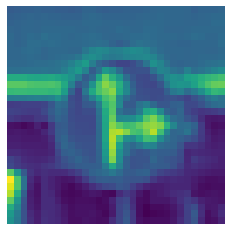

In [17]:
def grayscale(img):
  img =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # converts to gray 
  return img

img = grayscale(X_train[900])
plt.imshow(img)
plt.axis("off")
print(img.shape)


#Histogram_equalization.
Histogram equalization aims to standardize the lighting and all our images.

While some of our images are very bright and others very dim after histogram equalization, these images

will have a similar lighting effect.

(32, 32)


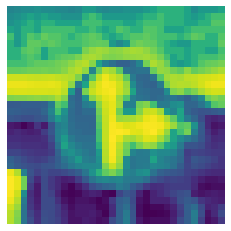

In [18]:
def equalize(img):
  img =cv2.equalizeHist(img) # equalizeHist only excepts grayscale images 
  return img 

img = equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)



#Map function.

What that will do is iterate through the entire array and for every element of the array that it loops

through returns a new element based on the specified function that's executed for each item in the array,

ultimately creating a new array with updated values.
The map funtion returns as a list

So,after getting that we will have to convert the data into a numpy array to update the X_train data with pre- processed data. 

In [19]:
def preprossing(img):
  img =grayscale(img)
  img =equalize(img)
  img =img/255 #normilization
  return img 

X_train = np.array(list(map(preprossing, X_train))) # returns as a list
X_val = np.array(list(map(preprossing, X_val))) # returns as a list
X_test = np.array(list(map(preprossing, X_test))) # returns as a list


(34799, 32, 32)


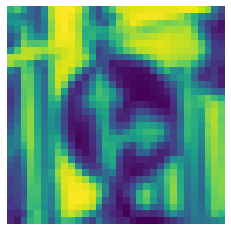

In [20]:
plt.imshow(X_train[1140])
plt.axis("off")
print(X_train.shape)

In [21]:
X_train = X_train.reshape(34799, 32, 32,1)
X_test = X_test.reshape(12630, 32, 32,1)
X_val = X_val.reshape(4410, 32, 32,1)


#Data augmentation
Process of creating new  data for our model during the training process.

We take the existing data sets and transforming or altering the images to make new images. 

It allows to look at images from a diffrent perspective, this allows us to get more features from a specific dataset, which will also increase the accuracy form the dataset. 
 
The next step in the process is to make a call to the image data generator class.

This class will allow us to define the types of transformations we want to make to our data sets.

And it will also allow us to set range limits for just how extreme these transformations can get.

This class takes in a variety of arguments, each of which allows for unique transformations
to our data sets.

We are going to be using  the five following transformations with -: 
Width_shift_range.
height_Shifts_range.
zoom_range.
share_range.
rotation_range 
 
Five transformations will add sufficient variety to our data sets and will allow
the training process to be much more effective.

Now, let's define the ranges for each of these transformations.

The first transformation is Width_shift_range.

This refers to a horizontal translation in the image which will cause our images to be off centered.

This will help our model adapt to test images that aren't necessarily going to be centered.

This ranged can be defined in two ways.

If the range value is defined as a number between zero and one, then it refers to the fraction of the image that can be shifted.

For example, a value of zero point one would simply imply that the maximum horizontal shift possible is 10 percent of the width the the image.

The height shift range is similar the only difference being that it refers to a vertical translation within the image rather than a horizontal one.
The range value is the same as the one in width_shift_range. 

 The Zoome transformation  will either zoom out or into the image, the degree of zoom can be defined with a float value between zero and one, while the maximum outer

zoom is defined by one minus the float value and the maximum inner zoom is defined by a one plus the float value.


A sheer mapping is a linear map that displaces each point in fixed direction by an amount proportional to its size and distance from a line that is parallel to that direction.

The roatation_range simply rotates an image with a ceratin value of degress, it's done with a int value. 

In [22]:
# data Agmentation 
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range= 0.1,
                   height_shift_range= 0.1,
                   zoom_range= 0.2,
                   shear_range=0.1,
                   rotation_range=10)
# for X_batch, y_batch in
datagen.fit(X_train)


(15, 32, 32, 1)


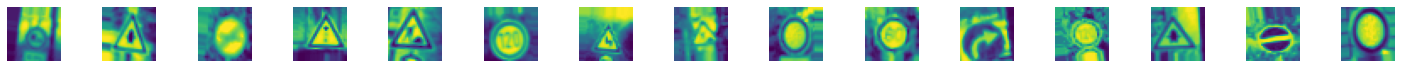

In [23]:
 
batches = datagen.flow(X_train, Y_train, batch_size = 15)
X_batch, Y_batch = next(batches)
 
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()
 
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32))
    axs[i].axis("off")
 
print(X_batch.shape)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [25]:
Y_train = to_categorical(Y_train, 43)
Y_test = to_categorical(Y_test, 43)
Y_val = to_categorical(Y_val, 43)


#Fine tuning
Changing the learning rate can have changes to the output, initially the learning rate(Adam) was 0.01, and the accuracy we got was 0.092, not changing it to a factor of 0.001 has reveled some chanege, as we know that if a learning rate is to big it will cause the accuracy to decrease,so by making a small change to the Adam optimizer we can increase our accuracy. 

Changing the amount of filters will also help with the accuracy, because it will extract more number of features which will then result in improved accuracy 

Adding more convolutional layers will also help with the accuracy as it get processed more and even more fetures are extracted, but keep in mind as we increase the layer so will the computational power of the computer. 

The parameters will decrease is because with each convolutional layer the dimention of our image will decreaase and by the time it reacches the fully connected layer(Dense ) the image will have much smaller parameter, which will decrese our parameters. 

Will require less computational power. 

Adding another dropout layer will help us overcome the problem of overfitting.

We decreased the learning rate, allowing our model to learn more slowly but more effectively.

We increased the number of filters in our convolutional layers, as well as the number of convolutional

layers to allow for more effective feature extraction.

And finally, we added a dropout layer to prevent overfitting of our data.

With all these modifications, we saw significant improvement in accuracy and prevented overfitting.


In [26]:
def modified_model(): 
  model = Sequential()
  model.add(Conv2D(60,(5,5),input_shape = (32,32,1),activation='relu'))
  model.add(Conv2D(60,(5,5),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D( 30,(3,3), activation= 'relu'))
  model.add(Conv2D( 30,(3,3), activation= 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(500, activation= 'relu'))
 # model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(learning_rate= 0.001),loss = "categorical_crossentropy",metrics = ['accuracy']) 
  return model


In [27]:
model = modified_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 30)          0

#model.fit_generator 
 Fit generator.

Fit generator is capable of running our image generator in parallel with the model training process,the statement will train our model using the augmented data produced by our generator.

In [28]:
#history = model.fit(X_train,Y_train, epochs= 10, validation_data=(X_val, Y_val), batch_size= 400,verbose = 1, shuffle= 1 )

history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=50),
                           # steps_per_epoch=2000, it seems to be casusing problems
                            epochs=10,
                            validation_data=(X_val, Y_val), shuffle = 1) 
                            
                            #data augmentation needs to be fixed. 


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
696/696 [==============================] - 17s 20ms/step - loss: 1.8813 - accuracy: 0.4597 - val_loss: 0.4543 - val_accuracy: 0.8596
Epoch 2/10
696/696 [==============================] - 14s 20ms/step - loss: 0.7648 - accuracy: 0.7592 - val_loss: 0.1718 - val_accuracy: 0.9546
Epoch 3/10
696/696 [==============================] - 13s 19ms/step - loss: 0.5220 - accuracy: 0.8355 - val_loss: 0.1067 - val_accuracy: 0.9717
Epoch 4/10
696/696 [==============================] - 13s 19ms/step - loss: 0.3991 - accuracy: 0.8730 - val_loss: 0.0855 - val_accuracy: 0.9778
Epoch 5/10
696/696 [==============================] - 13s 19ms/step - loss: 0.3313 - accuracy: 0.8956 - val_loss: 0.0908 - val_accuracy: 0.9744
Epoch 6/10
696/696 [==============================] - 14s 20ms/step - loss: 0.2774 - accuracy: 0.9115 - val_loss: 0.0536 - val_accuracy: 0.9848
Epoch 7/10
696/696 [==============================] - 14s 20ms/step - loss: 0.2474 - accuracy: 0.9233 - val_loss: 0.0458 - val_accuracy:

Text(0.5, 0, 'epoch')

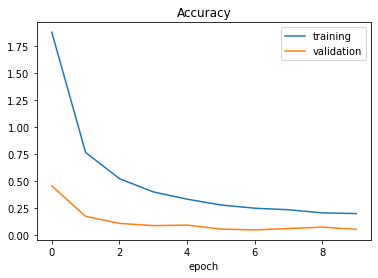

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

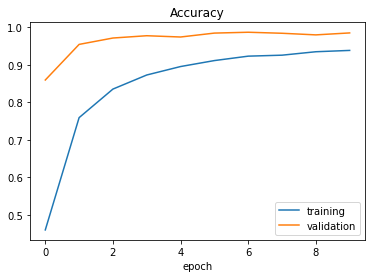

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [31]:
score = model.evaluate(X_test,Y_test,verbose = 0)

print('test Score: ', score[0])
print('test accuracy: ', score[1])

test Score:  0.14304399490356445
test accuracy:  0.9612034559249878


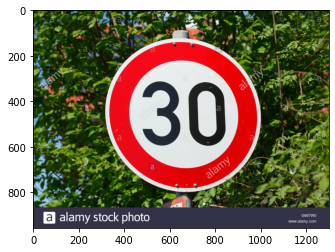

In [32]:
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 


(32, 32)


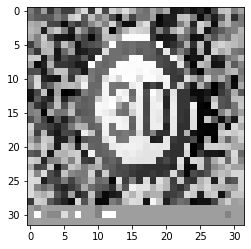

In [33]:
#Preprocess image
img = np.asarray(img)
img = cv2.resize(img, (32, 32)) #because  we trained our model on 32/32 
img = preprossing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [34]:
#Reshape reshape 
img = img.reshape(1, 32, 32, 1)
 

In [35]:
#Test image
print("predicted sign: "+ str(model.predict(img)))

predicted sign: [[2.4966722e-02 9.6599221e-01 4.6769162e-03 3.2171816e-09 4.9802554e-07
  4.0011611e-03 1.3158048e-07 2.9039397e-04 7.2025490e-05 6.0122134e-14
  4.0959892e-13 3.6332490e-10 2.4338686e-12 4.6712915e-14 1.2196076e-13
  3.6282381e-12 2.0652713e-15 5.9062929e-18 1.2943737e-13 1.5740033e-12
  1.5852671e-10 2.5059244e-10 5.1835418e-15 3.1563459e-13 1.3278070e-12
  1.6996710e-09 2.6260119e-13 2.1131049e-13 1.5522890e-09 1.5292545e-10
  9.3173497e-11 6.4396266e-11 2.7281576e-17 4.7979307e-13 6.7872771e-16
  6.4934664e-14 4.5277141e-12 1.5964126e-13 1.0314891e-08 1.3229464e-11
  6.3020089e-10 5.9645757e-17 6.4052585e-17]]
